**Antes de iniciar a implementação do YOLOv8n precisamos instalar a biblioteca ultralytics, a qual é baseada no framework YOLO e é utilizada em tarefas de visão computacional, como detecção de objetos, segmentação de imagens e classificação de imagens.**



In [ ]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 910.1/910.1 kB 16.0 MB/s eta 0:00:00


**Agora podemos importá-la no código para utilizar o framework:**

In [ ]:
from ultralytics import YOLO
model = YOLO('yolov8n.pt')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 75.3MB/s]


**Após isso criamos uma variável que receberáa pasta dos dados, e também referenciamos as classes que representarão cada subpasta:**



In [ ]:
# Caminho para as imagens organizadas por classe
image_folder = '/content/dataset'
classes = ['banana', 'broccoli', 'apple', 'orange', 'grape', 'indefinido']
true_labels = []  # Lista para rótulos verdadeiros
predicted_labels = []  # Lista para rótulos preditos

**Importando as bibliotecas para gerenciar os dados utilizados:**

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

In [ ]:
# Criando a pasta para salvar predições
os.makedirs('/content/predictions', exist_ok=True)

# **Próxima célula:**


*   Itera sobre cada imagem na lista.

*   Obtém o rótulo verdadeiro da imagem.

*   Usa o modelo para prever os objetos na imagem.

*   Verifica se houve detecções:
Se sim, obtém o nome da primeira classe detectada.
Se não, define a classe como "indefinido".


*   Armazena o rótulo previsto.

*   Salva a imagem com as predições visuais na pasta /content/predictions.

In [ ]:
# Processando as imagens
for fruit in classes[:-1]:  # Exclui "indefinido" da iteração
    fruit_folder = os.path.join(image_folder, fruit)
    images = [os.path.join(fruit_folder, img) for img in os.listdir(fruit_folder) if img.endswith(('.jpg', '.png'))]

    for img_path in images:
        # Rótulo verdadeiro
        true_labels.append(fruit)

        # Realizando a predição (ajuste do limiar de confiança para 0.3)
        results = model(img_path, conf=0.3)

        if results[0].boxes:  # Verifica se há detecções
            detected_class = results[0].names[int(results[0].boxes.cls[0].item())]  # Nome da classe detectada
        else:
            detected_class = "indefinido"  # Classe para imagens sem detecções
        detectedcounter = detectedcounter + 1

        predicted_labels.append(detected_class)

        # Salvando a imagem com predições
        save_path = f"/content/predictions/{os.path.basename(img_path)}"
        results[0].plot(show=False, save=True, filename=save_path)
print(f'{true_labels}?')



image 1/1 /content/dataset/banana/banana3.jpg: 640x640 2 bananas, 247.3ms
Speed: 8.7ms preprocess, 247.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/dataset/banana/banana9.jpg: 448x640 1 banana, 170.5ms
Speed: 3.2ms preprocess, 170.5ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/dataset/banana/banana1.jpg: 384x640 8 bananas, 168.3ms
Speed: 4.8ms preprocess, 168.3ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/dataset/banana/banana7.jpg: 480x640 2 bananas, 185.7ms
Speed: 4.5ms preprocess, 185.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/dataset/banana/banana8.jpg: 448x640 2 bananas, 237.1ms
Speed: 3.3ms preprocess, 237.1ms inference, 3.0ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/dataset/banana/banana4.jpg: 448x640 5 bananas, 403.4ms
Speed: 9.1ms preprocess, 403.4ms inference, 2.2ms postprocess

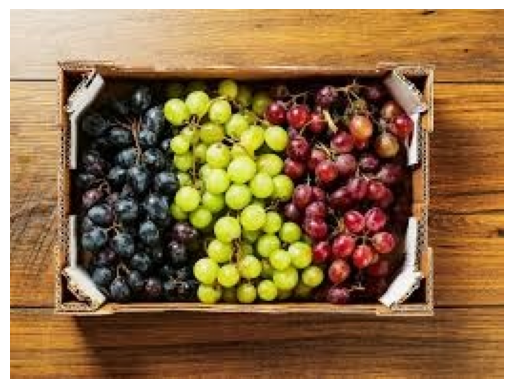

In [ ]:
# Exibindo algumas imagens com predições
example_img = '/content/predictions/uva8.jpg'
image = mpimg.imread(example_img)
plt.imshow(image)
plt.axis('off')
plt.show()

# **Calculando a precisão global:**



In [ ]:
TP = sum([1 for t, p in zip(true_labels, predicted_labels) if t == p and p != "indefinido"]) #Calculando True Positives
FP = len([p for p in predicted_labels if p != "indefinido"]) - TP #Calculando False Positives
precision = TP / (TP + FP) if (TP + FP) > 0 else 0 #Métrica utilizada: Precisão
print(f"Precisão: {precision:.2f}")
for t, p in zip(true_labels, predicted_labels):
    print(f"Verdadeiro: {t}, Previsto: {p}")

Precisão: 0.91
Verdadeiro: banana, Previsto: banana
Verdadeiro: banana, Previsto: banana
Verdadeiro: banana, Previsto: banana
Verdadeiro: banana, Previsto: banana
Verdadeiro: banana, Previsto: banana
Verdadeiro: banana, Previsto: banana
Verdadeiro: banana, Previsto: banana
Verdadeiro: banana, Previsto: banana
Verdadeiro: banana, Previsto: banana
Verdadeiro: banana, Previsto: banana
Verdadeiro: broccoli, Previsto: broccoli
Verdadeiro: broccoli, Previsto: broccoli
Verdadeiro: broccoli, Previsto: broccoli
Verdadeiro: broccoli, Previsto: broccoli
Verdadeiro: broccoli, Previsto: bowl
Verdadeiro: broccoli, Previsto: broccoli
Verdadeiro: broccoli, Previsto: broccoli
Verdadeiro: broccoli, Previsto: broccoli
Verdadeiro: broccoli, Previsto: broccoli
Verdadeiro: broccoli, Previsto: broccoli
Verdadeiro: apple, Previsto: apple
Verdadeiro: apple, Previsto: apple
Verdadeiro: apple, Previsto: apple
Verdadeiro: apple, Previsto: apple
Verdadeiro: apple, Previsto: apple
Verdadeiro: apple, Previsto: apple

# **Criando a matriz de confusão:**

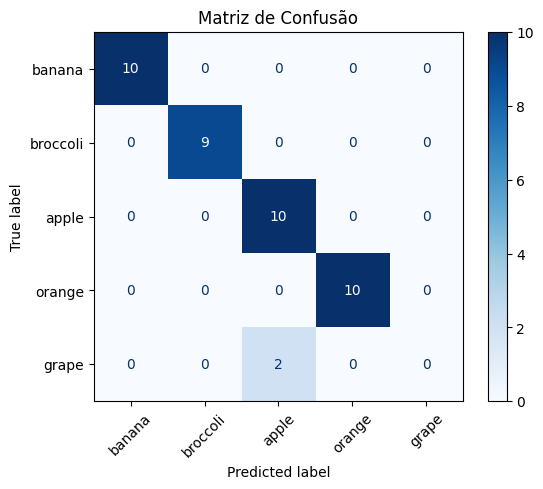

In [ ]:
# Excluindo "indefinido" da confusion matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=classes[:-1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes[:-1])
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title('Matriz de Confusão')
plt.show()